In [535]:
import networkx as nx
import numpy as np

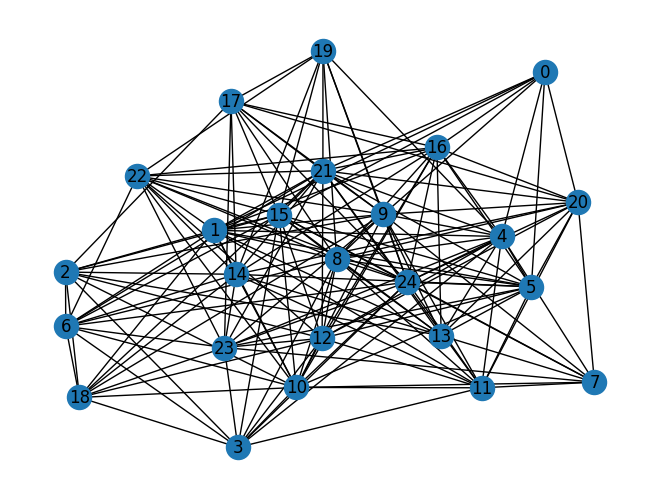

In [536]:
while True:
    graph = nx.fast_gnp_random_graph(25, 0.3, directed=True)
    if nx.is_strongly_connected(graph) and not nx.is_bipartite(graph):
        break

graph = graph.to_undirected()
        
nx.draw(graph, with_labels=True)

In [537]:
A = nx.to_numpy_array(graph)
D = np.diag(np.sum(A, axis=1))
D_inv = np.diag(np.sum(A, axis=1)**-1)
P = D_inv @ A  # Normalize the adjacency matrix to get a transition matrix. Note that all transitions have the same chance.
L = D - A
L = np.sqrt(D_inv)@L@np.sqrt(D_inv)  # Normalized Laplacian
# L = D_inv@L  # rw-normalized Laplacian
# L = nx.directed_laplacian_matrix(graph, walk_type='random')  # Properly normalized Laplacian for DiGraph

In [538]:
x0 = np.array([1/len(graph)] * len(graph))
print(x0)

[0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04]


In [539]:
x = x0
t = 0
while np.all(x != x@P):
    x = x@P
    t += 1
print(t, x)

28 [0.02 0.05 0.03 0.03 0.04 0.04 0.04 0.03 0.05 0.05 0.05 0.04 0.04 0.04
 0.04 0.05 0.04 0.03 0.03 0.03 0.04 0.05 0.04 0.04 0.05]


In [540]:
np.set_printoptions(precision=3)

In [541]:
# Get the eigenvalues and vectors of the Laplacian and sort them by the eigenvalues

vals, vecs = np.linalg.eig(L)
order = np.argsort(vals)
vals = vals[order]
vecs = vecs[:, order]
vecs *= np.sign(vecs[0, 0])  # Make the first vector positive

In [542]:
vals  # Make sure vals[0] == 0. If L is asymmetric you may get complex numbers here

array([3.491e-17, 6.652e-01, 7.748e-01, 7.789e-01, 8.478e-01, 8.626e-01,
       8.885e-01, 9.127e-01, 9.435e-01, 9.645e-01, 9.819e-01, 9.868e-01,
       1.022e+00, 1.057e+00, 1.088e+00, 1.102e+00, 1.119e+00, 1.142e+00,
       1.152e+00, 1.227e+00, 1.267e+00, 1.270e+00, 1.282e+00, 1.322e+00,
       1.343e+00])

In [543]:
vecs

array([[ 1.548e-01,  2.910e-01,  1.478e-01, -2.440e-01,  9.077e-02,
         6.677e-02, -3.385e-01, -1.694e-01, -1.112e-01, -4.392e-01,
         1.551e-01, -4.259e-04,  6.931e-02,  5.496e-02, -1.050e-01,
         2.602e-01,  2.428e-01,  1.296e-01,  1.639e-02,  1.621e-01,
         9.205e-02, -9.748e-02, -3.208e-01, -2.548e-01,  2.239e-01],
       [ 2.189e-01, -2.730e-02,  2.203e-01, -2.947e-01,  9.213e-02,
        -1.567e-01, -2.570e-01,  2.569e-01,  1.394e-01, -1.841e-03,
         1.584e-01, -5.757e-02, -5.405e-03, -1.009e-01,  4.018e-01,
        -5.697e-02,  3.784e-02, -4.601e-01,  9.431e-02, -3.577e-01,
        -1.465e-01,  1.888e-01, -8.027e-02,  9.188e-02,  7.881e-02],
       [ 1.815e-01, -3.189e-01,  1.476e-01, -1.420e-01, -2.063e-01,
        -3.389e-01,  7.424e-02, -2.926e-01,  7.925e-02,  1.208e-02,
        -4.205e-02, -8.089e-02,  1.791e-01,  1.671e-03,  1.593e-01,
         3.101e-01, -2.552e-01,  7.706e-02, -2.668e-01, -2.325e-03,
        -1.856e-01, -3.892e-01, -1.787e-01,  1

In [544]:
vecs[:, 0]**2  # Eigenvector associated with eigenvalue 0

array([0.024, 0.048, 0.033, 0.033, 0.045, 0.045, 0.036, 0.027, 0.051,
       0.051, 0.048, 0.039, 0.042, 0.036, 0.045, 0.048, 0.042, 0.033,
       0.03 , 0.027, 0.039, 0.054, 0.039, 0.039, 0.048])

In [545]:
x

array([0.024, 0.048, 0.033, 0.033, 0.045, 0.045, 0.036, 0.027, 0.051,
       0.051, 0.048, 0.039, 0.042, 0.036, 0.045, 0.048, 0.042, 0.033,
       0.03 , 0.027, 0.039, 0.054, 0.039, 0.039, 0.048])